수치미분/적분 다 scipy에 있다!
수치적분 -> integrated

# SciPy 시작하기

## SciPy란

* 과학기술계산용 함수 및 알고리즘 제공
* Home
 * http://www.scipy.org/
* Documentation
 * http://docs.scipy.org/doc/
* Tutorial
 * http://docs.scipy.org/doc/scipy/reference/tutorial/index.html
 * http://www.scipy-lectures.org/intro/scipy.html

## SciPy Subpackages

* scipy.stats	    
 * 통계 Statistics 
* scipy.constants	
 * 물리/수학 상수 Physical and mathematical constants
* scipy.special  	
 * 수학 함수 Any special mathematical functions
* scipy.linalg	    
 * 선형 대수 Linear algebra routines
* scipy.interpolate	
 * 보간 Interpolation
* scipy.optimize	
 * 최적화 Optimization
* scipy.fftpack 
 * Fast Fourier transforms

## scipy.stats 통계

* Random Variable 
 * 확률 밀도 함수, 누적 확률 함수
 * 샘플 생성
 * Parameter Estimation (fitting)
* Test 

## scipy.stats 에서 제공하는 확률 모형

* http://docs.scipy.org/doc/scipy/reference/stats.html
* Continuous
 * http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats
 * `uniform`:	A uniform continuous random variable.
 * `norm`:	A normal continuous random variable.
 * `beta`:	A beta continuous random variable.
 * `gamma`:	A gamma continuous random variable.
 * `t`:	A Student’s T continuous random variable.
 * `chi2`:	A chi-squared continuous random variable.
 * `f`:	An F continuous random variable.
 * `multivariate_normal`:	A multivariate normal random variable.
 * `dirichlet`:	A Dirichlet random variable.
 * `wishart`: A Wishart random variable.
* Discrete
 * http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-distributions-in-scipy-stats
 * `bernoulli`: 	A Bernoulli discrete random variable.
 * `binom`: 	A binomial discrete random variable.
 * `boltzmann`: 	A Boltzmann (Truncated Discrete Exponential) random variable.


*  random variable 사용 방법
 1. 파라미터를 주고 random variable object 생성
 2. method 사용


* Common Method 
 * `rvs`: 샘플 생성  (random value sampling) => 실제로 많이 쓸것이다. 100 하면 100개 뽑아줌.
 * `pdf` or `pmf`: Probability Density Function
 * `cdf`: Cumulative Distribution Function
 * `stats`: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
 * `moment`: non-central moments of the distribution
 * `fit`: parameter estimation  => 어떤 샘플이 있을때,(정규분포라면), 중앙값 평균, 계산해준다.

* Common Parameters
 * parameter는 모형 마다 달라진다.
 * `random_state`: seed
 * `size`: 생성하려는 샘플의 shape
 * `loc`: 일반적으로  평균의 값
 * `scale`: 일반적으로 표준편차의 값

In [7]:
rv = sp.stats.norm(loc=10, scale=10) # 정규분포는 노말이고, loc, scale은 선택이다. location = 평균, scale 은 표준편차?
rv.rvs(size=(3,10), random_state=1)  # rvs = 실제 샘플 생성. (3x10) , random_state => seed값임.

array([[ 26.24345364,   3.88243586,   4.71828248,  -0.72968622,
         18.65407629, -13.01538697,  27.44811764,   2.38793099,
         13.19039096,   7.50629625],
       [ 24.62107937, -10.60140709,   6.77582796,   6.15945645,
         21.33769442,  -0.99891267,   8.27571792,   1.22141582,
         10.42213747,  15.82815214],
       [ -1.00619177,  21.4472371 ,  19.01590721,  15.02494339,
         19.00855949,   3.16272141,   8.77109774,   0.64230566,
          7.3211192 ,  15.30355467]])

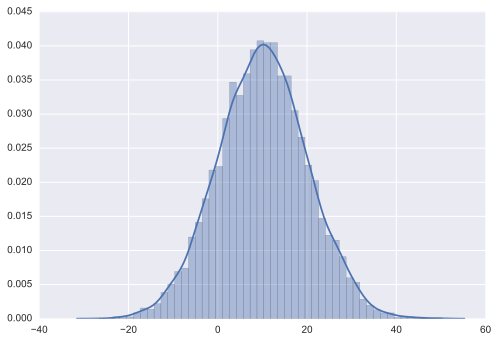

In [2]:
sns.distplot(rv.rvs(size=10000, random_state=1))

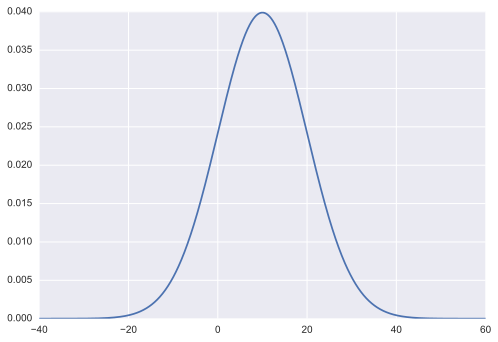

In [5]:
xx = np.linspace(-40, 60, 1000)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)  # 확률밀도함수를 그렸다!

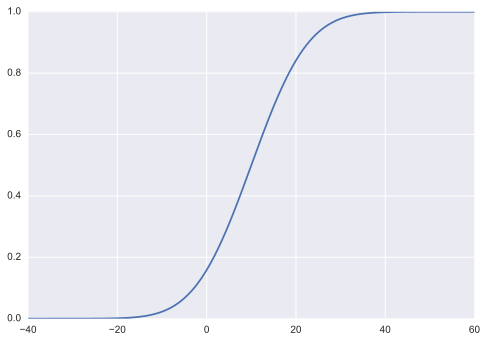

In [6]:
cdf = rv.cdf(xx)
plt.plot(xx, cdf)

## scipy.constants	 상수

* 특별 상수 
 * `scipy.pi`
* 기타 상수
 * `scipy.constants.XXXX`

* 단위
 * yotta, zetta, exa, peta, tera, giga, mega, kilo, hecto, deka
 * deci, centi, milli, micro, nano, pico, femto, atto, zepto
 * lb, oz, degree
 * inch, foot, yard, mile, au, light_year, parsec
 * hectare, acre, gallon
 * mph, mach, knot

In [ ]:
sp.pi

In [ ]:
import scipy.constants

In [ ]:
sp.constants.c # speed of light

## scipy.special  	 수학 함수

* Gamma, Beta, Erf, Logit
* Bessel,  Legendre

In [ ]:
x = np.linspace(-3, 3, 1000)
y1 = sp.special.erf(x)
a = plt.subplot(211)
plt.plot(x, y1)
plt.title("erf")
a.xaxis.set_ticklabels([])
y2 = sp.special.expit(x)
plt.subplot(212)
plt.plot(x, y2)
plt.title("logistic")

## scipy.linalg	선형대수

* inv, pinv, det

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
sp.linalg.inv(A)  

In [ ]:
sp.linalg.det(A)  

## scipy.interpolate 보간

* 자료 사이의 빠진 부분을 유추
* 1차원 보간
* 2차원 보간

In [ ]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'])

In [ ]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))
plt.pcolormesh(x, y, z)

In [ ]:
xnew, ynew = np.mgrid[-1:1:100j, -1:1:100j]
tck = sp.interpolate.bisplrep(x, y, z, s=0)
znew = sp.interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
plt.pcolormesh(xnew, ynew, znew)

## scipy.optimize	최적화

* 함수의 최소값 찾기

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [ ]:
result = optimize.minimize(f, 4)
print(result)
x0 = result['x']
x0

In [ ]:
plt.plot(x, f(x));
plt.hold(True)
plt.scatter(x0, f(x0), s=200)

In [ ]:
x1 = optimize.minimize(sixhump, (1, 1))['x']
x2 = optimize.minimize(sixhump, (-1, -1))['x']
print(x1, x2)

## scipy.fftpack 고속 퓨리에 변환 Fast Fourier transforms

* 신호를 주파수(frequency)영역으로 변환
* 스펙트럼(spectrum)

In [ ]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)
plt.plot(sig)

In [ ]:
import scipy.fftpack
sample_freq = sp.fftpack.fftfreq(sig.size, d=time_step)
sig_fft = sp.fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
plt.stem(freqs[:50], power[:50])
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

In [12]:
rv = sp.stats.norm(10,10)

In [13]:
x = rv.rvs(100)

In [14]:
x

array([ 22.28736285,  12.55702589,   6.85429858,  36.9366106 ,
        -5.16812188,   0.21865305,   1.69254289,  -2.67445759,
         2.64101762,  20.11785912,  11.44895758,   3.09016353,
         2.80789599,   2.6713965 ,   7.01201171,  20.70228861,
         5.92576521,   0.17393079,   9.57514822,   4.39510529,
         6.17989209,   1.39571749,  15.23344658,  29.72220783,
         8.31655528,  -1.17169479,  15.98203325,   7.25287532,
         7.28766697,  25.89238501,  14.34144025,  24.29529748,
        19.09805308,  12.29265301,  21.43485661,   6.65085262,
         3.03043895,   7.6874603 ,   4.15557523,  21.22139564,
        -1.21335156,  28.48371541,   7.87050265,  21.41820568,
         3.47922416,  11.91215809,   2.90654763,  -8.71999403,
        11.35923248,  -4.67965933,  16.2474973 ,  -2.1729665 ,
        16.15043155,  13.29465391,  -9.79516548,  23.93073335,
        15.25457721,  21.31669326,  -3.25220919,  21.72575812,
        17.06344171,  19.76252442,  20.6819124 ,  -1.15

In [18]:
x_avg, x_std = sp.stats.norm.fit(x)

In [38]:
x_std

10.426648295920025

In [37]:
x_graph = rv.pdf(x)

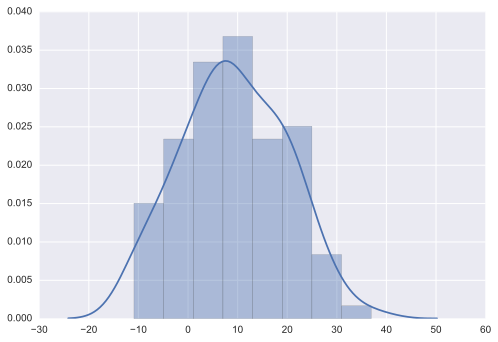

In [41]:
sns.distplot(x)

In [27]:
y = rv.rvs(30, 100)
y

array([ -7.49765473,  13.42680403,  21.53035803,   7.47563963,
        19.81320787,  15.14218841,  12.21179669,  -0.70043331,
         8.10504169,  12.55001444,   5.41973014,  14.35163488,
         4.1640495 ,  18.16847072,  16.72720806,   8.95588857,
         4.68719623,  20.29732685,   5.61864377,  -1.18318246,
        26.18981661,  25.41605175,   7.48120861,   1.57564262,
        11.84518691,  19.37082201,  17.31000344,  23.61556125,
         6.73761941,  10.55676015])

In [17]:
y.mean()

11.136838117733847

In [35]:
y_avg, y_std = sp.stats.norm.fit(y)

In [31]:
y_graph = sp.stats.norm(y_avg, y_std)

In [32]:
y_graph

In [56]:
aaa_list = []

for _ in range(30):
    aaa = rv.rvs(100)
    aaa_list.append(aaa.mean())
aaa_list

[10.715125604908904,
 10.493890251075495,
 8.6609173069345395,
 8.6172963299617784,
 11.133360217376152,
 9.4370018965229345,
 9.5402215025137203,
 8.5429106188762667,
 9.6684941886821818,
 8.75044898666326,
 8.3443105756822842,
 9.2750484694983086,
 10.284959810696737,
 10.614192390591018,
 8.7597548866551449,
 10.150796142551044,
 11.024685362092585,
 8.8909452476899418,
 9.5220614356351447,
 10.642279500237551,
 11.289663142147747,
 9.4728524495219286,
 8.8172055157785483,
 9.6536179756169673,
 10.061036673894057,
 10.41898759720992,
 9.0892179221606337,
 9.6476012005798211,
 10.21097278972225,
 9.0697686694506903]

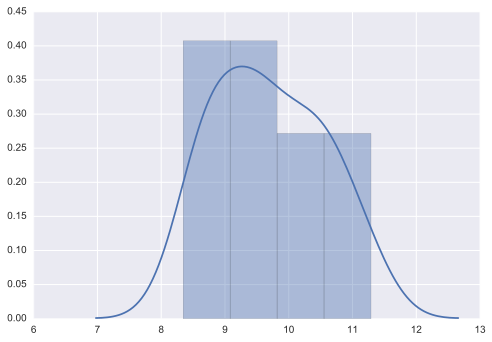

In [57]:
sns.distplot(aaa_list)

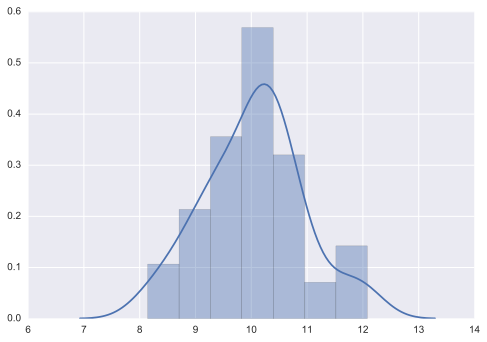

In [52]:
sns.distplot(sp.stats.norm(10,10).rvs((50,100)).mean(axis=1));